In [1]:
%matplotlib inline
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.utils import resample
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import pandas as pd
import matplotlib.cm as cm
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from sklearn.preprocessing import *
from sklearn.metrics import accuracy_score
pd.set_option('display.max_colwidth', -1)
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
test_label = pd.read_csv("test_labels.csv")
test = pd.read_csv("test.csv")
final_test = pd.concat([test, test_label], axis = 1)
final_test = final_test.query('toxic > -1')
final_test

,Unnamed: 0,id,comment_text,racism,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,6,0001ea8717f6de06,Thank you for understanding. I think very highly of you and would not revert without discussion.,0,0001ea8717f6de06,0,0,0,0,0,0
7,8,000247e83dcc1211,:Dear god this site is horrible.,0,000247e83dcc1211,0,0,0,0,0,0
11,12,0002f87b16116a7f,"""::: Somebody will invariably try to add Religion? Really?? You mean, the way people have invariably kept adding """"Religion"""" to the Samuel Beckett infobox? And why do you bother bringing up the long-dead completely non-existent """"Influences"""" issue? You're just flailing, making up crap on the fly. \n ::: For comparison, the only explicit acknowledgement in the entire Amos Oz article that he is personally Jewish is in the categories! \n\n """,1,0002f87b16116a7f,0,0,0,0,0,0
13,14,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a type. The """"Type"""" of institution is needed in this case because there are three levels of SUNY schools: \n -University Centers and Doctoral Granting Institutions \n -State Colleges \n -Community Colleges. \n\n It is needed in this case to clarify that UB is a SUNY Center. It says it even in Binghamton University, University at Albany, State University of New York, and Stony Brook University. Stop trying to say it's not because I am totally right in this case.""",0,0003e1cccfd5a40a,0,0,0,0,0,0
14,15,00059ace3e3e9a53,""" \n\n == Before adding a new product to the list, make sure it's relevant == \n\n Before adding a new product to the list, make sure it has a wikipedia entry already, """"proving"""" it's relevance and giving the reader the possibility to read more about it. \n Otherwise it could be subject to deletion. See this article's revision history.""",0,00059ace3e3e9a53,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
153150,153151,fff8f64043129fa2,":Jerome, I see you never got around to this…! I’m not surprised: I looked for an example of the ‘’in nomine’’ plainsong notaion and couldn’t find one online - to my astonishment too. \n :But maybe you could clear up a question for me: is the cantus firmus of the English ‘’in nomines’’ the plainchant (in the alto part), or one of Taverner’s other three parts? This is not clear to me in the article. If the ‘’in nomines’’ are based on the plainchant, then where does Taverner come into it? Your expertise would be most appreciated, and maybe the article requires some explanation to this effect.",0,fff8f64043129fa2,0,0,0,0,0,0
153151,153152,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundation.org/wiki/Press_releases/English_Wikipedia_Announces_Thousandth_Featured_Article \n\n Heh you are famous now. I kida envy that. Congrats.,0,fff9d70fe0722906,0,0,0,0,0,0
153154,153155,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak about gays and not about romanians...,0,fffa8a11c4378854,0,0,0,0,0,0
153155,153156,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MOVIES. HE HAS SO MUCH BUTTSEX THAT HIS ASSHOLE IS NOW BIG ENOUGH TO BE CONSIDERED A COUNTRY.,0,fffac2a094c8e0e2,1,0,1,0,1,0


In [3]:
train = pd.read_csv("train.csv")
final_test.columns

Index(['Unnamed: 0', 'id', 'comment_text', 'racism', 'id', 'toxic',
       'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],
      dtype='object')

# Racism

In [4]:
test_label = pd.read_csv("test_labels.csv")
test = pd.read_csv("test.csv")
final_test = pd.concat([test, test_label], axis = 1)
final_test = final_test.query('toxic > -1')
final_test
train = pd.read_csv("train.csv")

In [5]:
train_racism_minority = train[train.racism == 1]
train_racism_majority = train[train.racism == 0]

train_racism_majority_downsampled = resample(train_racism_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2265,     # to match minority class
                                 random_state=123) # reproducible results

In [6]:
train_downsampled_racism = pd.concat([train_racism_majority_downsampled, train_racism_minority])

In [7]:
train_downsampled_racism['racism'].value_counts()
# train_downsampled_racism

1    2265
0    2265
Name: racism, dtype: int64

In [8]:
tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(train_downsampled_racism['comment_text'])
X_test = tfidf.transform(final_test['comment_text'])

y = train_downsampled_racism['racism']
model = LogisticRegression()
model.fit(X_train, y)
final_test['Pred_racism'] = model.predict_proba(X_test)[:, 1]
test1 = final_test
# test1.drop('comment_text', axis=1, inplace=True)
test1.to_csv('logistic_racism.csv', index=False)

In [9]:
race_log1 = pd.read_csv("logistic_racism.csv")
race_log1
def CLASS(Pred_racism):
  
    if Pred_racism >= 0.5:
        return 1
    if Pred_racism < 0.5:
        return 0

        
race_log1['Pred_racism'] = race_log1['Pred_racism'].apply(CLASS)
dropvar = ['Unnamed: 0', 'id.1']
race_log1 = race_log1.drop(dropvar, axis = 1)
race_log1

,id,comment_text,racism,toxic,severe_toxic,obscene,threat,insult,identity_hate,Pred_racism
0,0001ea8717f6de06,Thank you for understanding. I think very highly of you and would not revert without discussion.,0,0,0,0,0,0,0,0
1,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0,0,0
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Religion? Really?? You mean, the way people have invariably kept adding """"Religion"""" to the Samuel Beckett infobox? And why do you bother bringing up the long-dead completely non-existent """"Influences"""" issue? You're just flailing, making up crap on the fly. \n ::: For comparison, the only explicit acknowledgement in the entire Amos Oz article that he is personally Jewish is in the categories! \n\n """,1,0,0,0,0,0,0,1
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a type. The """"Type"""" of institution is needed in this case because there are three levels of SUNY schools: \n -University Centers and Doctoral Granting Institutions \n -State Colleges \n -Community Colleges. \n\n It is needed in this case to clarify that UB is a SUNY Center. It says it even in Binghamton University, University at Albany, State University of New York, and Stony Brook University. Stop trying to say it's not because I am totally right in this case.""",0,0,0,0,0,0,0,0
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the list, make sure it's relevant == \n\n Before adding a new product to the list, make sure it has a wikipedia entry already, """"proving"""" it's relevance and giving the reader the possibility to read more about it. \n Otherwise it could be subject to deletion. See this article's revision history.""",0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
63973,fff8f64043129fa2,":Jerome, I see you never got around to this…! I’m not surprised: I looked for an example of the ‘’in nomine’’ plainsong notaion and couldn’t find one online - to my astonishment too. \n :But maybe you could clear up a question for me: is the cantus firmus of the English ‘’in nomines’’ the plainchant (in the alto part), or one of Taverner’s other three parts? This is not clear to me in the article. If the ‘’in nomines’’ are based on the plainchant, then where does Taverner come into it? Your expertise would be most appreciated, and maybe the article requires some explanation to this effect.",0,0,0,0,0,0,0,0
63974,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundation.org/wiki/Press_releases/English_Wikipedia_Announces_Thousandth_Featured_Article \n\n Heh you are famous now. I kida envy that. Congrats.,0,0,0,0,0,0,0,0
63975,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak about gays and not about romanians...,0,0,0,0,0,0,0,0
63976,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MOVIES. HE HAS SO MUCH BUTTSEX THAT HIS ASSHOLE IS NOW BIG ENOUGH TO BE CONSIDERED A COUNTRY.,0,1,0,1,0,1,0,1


In [10]:
cm = confusion_matrix(race_log1['racism'], race_log1['Pred_racism'])
print(cm)
print(classification_report(race_log1['racism'], race_log1['Pred_racism']))
print("Accuracy:",metrics.accuracy_score(race_log1['racism'], race_log1['Pred_racism']))
print("Precision:",metrics.precision_score(race_log1['racism'], race_log1['Pred_racism']))
print("Recall:",metrics.recall_score(race_log1['racism'], race_log1['Pred_racism']))
print("F1 Score:",metrics.f1_score(race_log1['racism'], race_log1['Pred_racism']))

[[57751  5158]
 [  104   965]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     62909
           1       0.16      0.90      0.27      1069

    accuracy                           0.92     63978
   macro avg       0.58      0.91      0.61     63978
weighted avg       0.98      0.92      0.94     63978

Accuracy: 0.9177529775860452
Precision: 0.15760248244324676
Recall: 0.9027128157156221
F1 Score: 0.2683537263626251


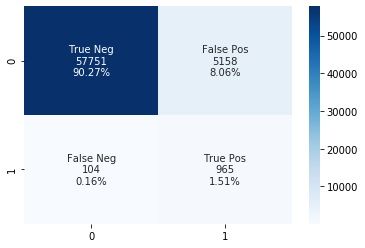

In [11]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

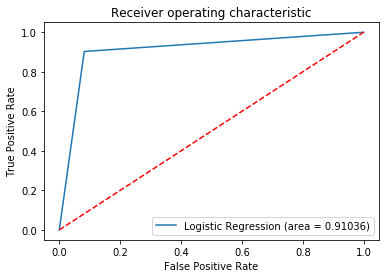

In [12]:
logit_roc = roc_auc_score(race_log1['racism'], race_log1['Pred_racism'])
fpr, tpr, thresholds = roc_curve(race_log1['racism'], race_log1['Pred_racism'])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % logit_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Racism Try 2

In [28]:
test_label = pd.read_csv("test_labels.csv")
test = pd.read_csv("test.csv")
final_test = pd.concat([test, test_label], axis = 1)
final_test = final_test.query('toxic > -1')
final_test
train = pd.read_csv("train.csv")
final_test.columns

Index(['Unnamed: 0', 'id', 'comment_text', 'racism', 'id', 'toxic',
       'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],
      dtype='object')

In [29]:
train_racism_minority = train[train.racism == 1]
train_racism_majority = train[train.racism == 0]

train_racism_majority_downsampled = resample(train_racism_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2265,     # to match minority class
                                 random_state=123) # reproducible results

train_downsampled_racism = pd.concat([train_racism_majority_downsampled, train_racism_minority])
train_downsampled_racism['racism'].value_counts()
train_downsampled_racism


a military salute that then stretched outward toward the flag. Historic photographs are at http://rexcurry.net/pledge2.html and at http://rexcurry.net/pledge_military.html   Due to the way that both gestures were used, the military salute led to the Nazi salute. The Nazi salute is an extended military salute. http://rexcurry.net/book1a1contents-pledge.html\n\n3. The Pledge’s creator was a self-proclaimed socialist in the nationalism movement in the USA and his dogma influenced socialists in Germany, and his Pledge was the origin of their salute. ""Nazi"" means ""National Socialist German Workers' Party."" A mnemonic device is the swastika (Hakenkreuz in German).  Although the swastika was an ancient symbol, it was also used sometimes by German National Socialists to represent ""S"" letters for their ""socialism.""  Hitler altered his own signature to use the same stylized ""S"" letter for ""socialist.""\nhttp://rexcurry.net/book1a1contents-swastika.html\n\nThe Pledge is part of the USA’s growing police-state.  The insane government in the U.S. could cause comatose persons to Pledge dis-allegiance, desecrate the flag, and recite a declaration of independence. Remove the Pledge from the flag, remove flags from schools, remove schools from government.\n\nAs a libertarian lawyer, Rex Curry provides pro bono services nationwide in schools and elsewhere, to educate the public about the news.\n\nGovernment schools will never teach children about their Pledge rights, nor the truth about the Pledge and its author.\n\nMost comments fail to ever mention that Francis Bellamy and his cousin Edward Bellamy were National Socialists in the USA, wrote for and supported their ""Nationalist"" and ""New Nation"" magazines, the ""Nationalist Educational Association"" and pushed their totalitarian dogma in their ""Nationalism"" clubs worldwide, including in Germany, and that the bible of their movement, Edward Bellamy's book ""Looking Backward"" was translated into every major language including the languages of those countries that became home to totalitarian socialism and the socialist Wholecaust (of which the Holocaust was a part) under the National Socialist German Workers' Party (21 million dead), the Union of Soviet Socialist Republics (62 million dead), and the Peoples' Republic of China (35 million dead).  It is easy to see why anyone would want to cover all of that up, but it should not be covered up.\n\nIn the USA, the Bellamy dogma supported a government takeover of education.  The government's schools imposed segregation by law and taught racism as official policy.  The USA's behavior was an example for three decades before the Nazis. As under Nazism, the Jehovah's Witnesses, and blacks and the Jewish and others in the USA attended government schools that dictated segregation, taught racism, and persecuted children who refused to perform the straight-arm salute and robotically chant the Pledge. Some kids were expelled from government schools and had to use the many better alternatives.  There were acts of violence. When Jesse Owens competed in the 1936 Olympics in Germany, his neighbors attended segregated government schools where they saluted the flag with the Nazi salute.  The U.S. practice of official racism even outlasted the horrid party.  And the schools and the Pledge still exist. The Pledge is still the most visible sign of the USA's growing police state.  \n\nAfter segregation in government's schools ended, the Bellamy legacy caused more police-state racism of forced busing that destroyed communities and neighborhoods and deepened hostilities.\n\nBellamy was a self-proclaimed national socialist in the USA, with the ""Nationalist"" magazine, and he preached what he called ""military socialism.""  The federal flag darkens schools because Bellamy wanted government to take over all schools and to eliminate all of the better alternatives.  Worse, Bellamy wanted the government to take over everything, not just schools. He wanted the 

In [30]:
tfidf = TfidfVectorizer(stop_words='english', lowercase = True, ngram_range = [1,2], min_df = 10)

X_train = tfidf.fit_transform(train_downsampled_racism['comment_text'])
X_test = tfidf.transform(final_test['comment_text'])

y = train_downsampled_racism['racism']
model = LogisticRegression(C = 3, class_weight = 'balanced')
model.fit(X_train, y)
final_test['Pred_racism'] = model.predict_proba(X_test)[:, 1]
test1 = final_test
# test1.drop('comment_text', axis=1, inplace=True)
test1.to_csv('logistic_racism2.csv', index=False)

In [100]:
race_log2 = pd.read_csv("logistic_racism2.csv")
race_log2
def CLASS(Pred_racism):
  
    if Pred_racism >= 0.5:
        return 1
    if Pred_racism < 0.5:
        return 0

        
race_log2['Pred_racism'] = race_log2['Pred_racism'].apply(CLASS)
dropvar = ['Unnamed: 0', 'id']
race_log2 = race_log2.drop(dropvar, axis = 1)
race_log2

,comment_text,racism,id.1,toxic,severe_toxic,obscene,threat,insult,identity_hate,Pred_racism
0,Thank you for understanding. I think very highly of you and would not revert without discussion.,0,0001ea8717f6de06,0,0,0,0,0,0,0
1,:Dear god this site is horrible.,0,000247e83dcc1211,0,0,0,0,0,0,0
2,"""::: Somebody will invariably try to add Religion? Really?? You mean, the way people have invariably kept adding """"Religion"""" to the Samuel Beckett infobox? And why do you bother bringing up the long-dead completely non-existent """"Influences"""" issue? You're just flailing, making up crap on the fly. \n ::: For comparison, the only explicit acknowledgement in the entire Amos Oz article that he is personally Jewish is in the categories! \n\n """,1,0002f87b16116a7f,0,0,0,0,0,0,1
3,""" \n\n It says it right there that it IS a type. The """"Type"""" of institution is needed in this case because there are three levels of SUNY schools: \n -University Centers and Doctoral Granting Institutions \n -State Colleges \n -Community Colleges. \n\n It is needed in this case to clarify that UB is a SUNY Center. It says it even in Binghamton University, University at Albany, State University of New York, and Stony Brook University. Stop trying to say it's not because I am totally right in this case.""",0,0003e1cccfd5a40a,0,0,0,0,0,0,0
4,""" \n\n == Before adding a new product to the list, make sure it's relevant == \n\n Before adding a new product to the list, make sure it has a wikipedia entry already, """"proving"""" it's relevance and giving the reader the possibility to read more about it. \n Otherwise it could be subject to deletion. See this article's revision history.""",0,00059ace3e3e9a53,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
63973,":Jerome, I see you never got around to this…! I’m not surprised: I looked for an example of the ‘’in nomine’’ plainsong notaion and couldn’t find one online - to my astonishment too. \n :But maybe you could clear up a question for me: is the cantus firmus of the English ‘’in nomines’’ the plainchant (in the alto part), or one of Taverner’s other three parts? This is not clear to me in the article. If the ‘’in nomines’’ are based on the plainchant, then where does Taverner come into it? Your expertise would be most appreciated, and maybe the article requires some explanation to this effect.",0,fff8f64043129fa2,0,0,0,0,0,0,0
63974,==Lucky bastard== \n http://wikimediafoundation.org/wiki/Press_releases/English_Wikipedia_Announces_Thousandth_Featured_Article \n\n Heh you are famous now. I kida envy that. Congrats.,0,fff9d70fe0722906,0,0,0,0,0,0,0
63975,==shame on you all!!!== \n\n You want to speak about gays and not about romanians...,0,fffa8a11c4378854,0,0,0,0,0,0,0
63976,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MOVIES. HE HAS SO MUCH BUTTSEX THAT HIS ASSHOLE IS NOW BIG ENOUGH TO BE CONSIDERED A COUNTRY.,0,fffac2a094c8e0e2,1,0,1,0,1,0,1


In [32]:
cm = confusion_matrix(race_log2['racism'], race_log2['Pred_racism'])
print(cm)
print(classification_report(race_log2['racism'], race_log2['Pred_racism']))
print("Accuracy:",metrics.accuracy_score(race_log2['racism'], race_log2['Pred_racism']))
print("Precision:",metrics.precision_score(race_log2['racism'], race_log2['Pred_racism']))
print("Recall:",metrics.recall_score(race_log2['racism'], race_log2['Pred_racism']))
print("F1 Score:",metrics.f1_score(race_log2['racism'], race_log2['Pred_racism']))

[[60885  2024]
 [   90   979]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     62909
           1       0.33      0.92      0.48      1069

    accuracy                           0.97     63978
   macro avg       0.66      0.94      0.73     63978
weighted avg       0.99      0.97      0.97     63978

Accuracy: 0.9669573916033637
Precision: 0.326007326007326
Recall: 0.9158091674462114
F1 Score: 0.48084479371316313


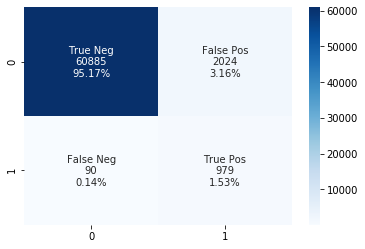

In [33]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

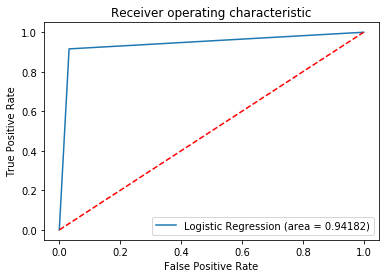

In [34]:
logit_roc = roc_auc_score(race_log2['racism'], race_log2['Pred_racism'])
fpr, tpr, thresholds = roc_curve(race_log2['racism'], race_log2['Pred_racism'])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % logit_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Toxic

In [91]:
test_label = pd.read_csv("test_labels.csv")
test = pd.read_csv("test.csv")
final_test = pd.concat([test, test_label], axis = 1)
final_test = final_test.query('toxic > -1')
final_test
train = pd.read_csv("train.csv")
final_test.columns

Index(['Unnamed: 0', 'id', 'comment_text', 'racism', 'id', 'toxic',
       'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],
      dtype='object')

In [92]:
train_downsampled_toxic['toxic'].value_counts()

1    15294
0    15294
Name: toxic, dtype: int64

In [93]:
train_toxic_minority = train[train.toxic == 1]
train_toxic_majority = train[train.toxic == 0]

train_toxic_majority_downsampled = resample(train_toxic_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=15294,     # to match minority class
                                 random_state=123) # reproducible results

train_downsampled_toxic = pd.concat([train_toxic_majority_downsampled, train_toxic_minority])
train_downsampled_toxic['toxic'].value_counts()
# train_downsampled_toxic

1    15294
0    15294
Name: toxic, dtype: int64

In [94]:
tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(train_downsampled_toxic['comment_text'])
X_test = tfidf.transform(final_test['comment_text'])

y = train_downsampled_toxic['toxic']
model = LogisticRegression()
model.fit(X_train, y)
final_test['Pred_toxic'] = model.predict_proba(X_test)[:, 1]
test1 = final_test
# test1.drop('comment_text', axis=1, inplace=True)
test1.to_csv('logistic_toxic.csv', index=False)

In [95]:
tox_log1 = pd.read_csv("logistic_toxic.csv")
tox_log1
def CLASS(Pred_toxic):
  
    if Pred_toxic >= 0.5:
        return 1
    if Pred_toxic < 0.5:
        return 0

        
tox_log1['Pred_toxic'] = tox_log1['Pred_toxic'].apply(CLASS)
dropvar = ['Unnamed: 0', 'id']
tox_log1 = tox_log1.drop(dropvar, axis = 1)
tox_log1

,comment_text,racism,id.1,toxic,severe_toxic,obscene,threat,insult,identity_hate,Pred_toxic
0,Thank you for understanding. I think very highly of you and would not revert without discussion.,0,0001ea8717f6de06,0,0,0,0,0,0,0
1,:Dear god this site is horrible.,0,000247e83dcc1211,0,0,0,0,0,0,1
2,"""::: Somebody will invariably try to add Religion? Really?? You mean, the way people have invariably kept adding """"Religion"""" to the Samuel Beckett infobox? And why do you bother bringing up the long-dead completely non-existent """"Influences"""" issue? You're just flailing, making up crap on the fly. \n ::: For comparison, the only explicit acknowledgement in the entire Amos Oz article that he is personally Jewish is in the categories! \n\n """,1,0002f87b16116a7f,0,0,0,0,0,0,0
3,""" \n\n It says it right there that it IS a type. The """"Type"""" of institution is needed in this case because there are three levels of SUNY schools: \n -University Centers and Doctoral Granting Institutions \n -State Colleges \n -Community Colleges. \n\n It is needed in this case to clarify that UB is a SUNY Center. It says it even in Binghamton University, University at Albany, State University of New York, and Stony Brook University. Stop trying to say it's not because I am totally right in this case.""",0,0003e1cccfd5a40a,0,0,0,0,0,0,0
4,""" \n\n == Before adding a new product to the list, make sure it's relevant == \n\n Before adding a new product to the list, make sure it has a wikipedia entry already, """"proving"""" it's relevance and giving the reader the possibility to read more about it. \n Otherwise it could be subject to deletion. See this article's revision history.""",0,00059ace3e3e9a53,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
63973,":Jerome, I see you never got around to this…! I’m not surprised: I looked for an example of the ‘’in nomine’’ plainsong notaion and couldn’t find one online - to my astonishment too. \n :But maybe you could clear up a question for me: is the cantus firmus of the English ‘’in nomines’’ the plainchant (in the alto part), or one of Taverner’s other three parts? This is not clear to me in the article. If the ‘’in nomines’’ are based on the plainchant, then where does Taverner come into it? Your expertise would be most appreciated, and maybe the article requires some explanation to this effect.",0,fff8f64043129fa2,0,0,0,0,0,0,0
63974,==Lucky bastard== \n http://wikimediafoundation.org/wiki/Press_releases/English_Wikipedia_Announces_Thousandth_Featured_Article \n\n Heh you are famous now. I kida envy that. Congrats.,0,fff9d70fe0722906,0,0,0,0,0,0,1
63975,==shame on you all!!!== \n\n You want to speak about gays and not about romanians...,0,fffa8a11c4378854,0,0,0,0,0,0,1
63976,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MOVIES. HE HAS SO MUCH BUTTSEX THAT HIS ASSHOLE IS NOW BIG ENOUGH TO BE CONSIDERED A COUNTRY.,0,fffac2a094c8e0e2,1,0,1,0,1,0,1


In [96]:
cm = confusion_matrix(tox_log1['toxic'], tox_log1['Pred_toxic'])
print(cm)
print(classification_report(tox_log1['toxic'], tox_log1['Pred_toxic']))
print("Accuracy:",metrics.accuracy_score(tox_log1['toxic'], tox_log1['Pred_toxic']))
print("Precision:",metrics.precision_score(tox_log1['toxic'], tox_log1['Pred_toxic']))
print("Recall:",metrics.recall_score(tox_log1['toxic'], tox_log1['Pred_toxic']))
print("F1 Score:",metrics.f1_score(tox_log1['toxic'], tox_log1['Pred_toxic']))

[[49667  8221]
 [  705  5385]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     57888
           1       0.40      0.88      0.55      6090

    accuracy                           0.86     63978
   macro avg       0.69      0.87      0.73     63978
weighted avg       0.93      0.86      0.88     63978

Accuracy: 0.8604832911313264
Precision: 0.3957812729678083
Recall: 0.8842364532019704
F1 Score: 0.5468115353371242


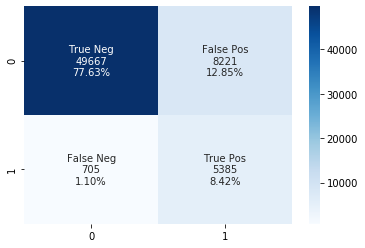

In [97]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

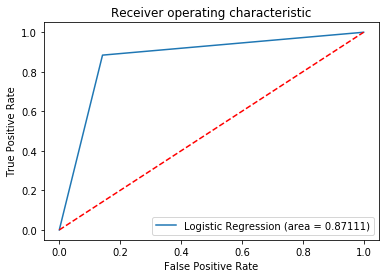

In [98]:
logit_roc = roc_auc_score(tox_log1['toxic'], tox_log1['Pred_toxic'])
fpr, tpr, thresholds = roc_curve(tox_log1['toxic'], tox_log1['Pred_toxic'])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % logit_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Toxic Try 2

In [7]:
test_label = pd.read_csv("test_labels.csv")
test = pd.read_csv("test.csv")
final_test = pd.concat([test, test_label], axis = 1)
final_test = final_test.query('toxic > -1')
final_test
train = pd.read_csv("train.csv")
final_test.columns

Index(['Unnamed: 0', 'id', 'comment_text', 'racism', 'id', 'toxic',
       'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],
      dtype='object')

In [8]:
train_toxic_minority = train[train.toxic == 1]
train_toxic_majority = train[train.toxic == 0]

train_toxic_majority_downsampled = resample(train_toxic_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=15294,     # to match minority class
                                 random_state=123) # reproducible results

train_downsampled_toxic = pd.concat([train_toxic_majority_downsampled, train_toxic_minority])
train_downsampled_toxic['toxic'].value_counts()
train_downsampled_toxic

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,racism
25946,25947,44b14c2d39cb089a,"""\n File:Bust of Otis Bowen.jpg listed for deletion \nA file that you uploaded or altered, File:Bust of Otis Bowen.jpg, has been listed at Wikipedia:Files for deletion. Please see the discussion to see why this is (you may have to search for the title of the image to find its entry), if you are interested in it not being deleted. Thank you. hi! """,0,0,0,0,0,0,0
39853,39854,6a61ce6cdf0c193f,"WP:BOOMERANG rebuttal \n\nI would like to point out that I said that after I had already asked this user to stop reverting my edits and instead he did not respond and just deleted my comments from his talk page, he then went and found a completely separate article I created over 1/2 a year ago a nominated for deletion. This is obviously harrassment. Just because made angry comments to one ignorant user, does not make me uncivil. When my negative comments were reverted I instead issued a warning template for harrassment to wp:logical cowboy, and asked him to please cease and desist with harassing me, next thing I know I've been blocked.",0,0,0,0,0,0,0
39117,39118,686182438c1b8c10,"Further note to potential reviewing admin If we have interacted in the past, thank you for your interest, but allow an uninvolved admin to review this. I will of course accept any further review. - (resonate)",0,0,0,0,0,0,0
111546,111547,54bb3a15477f2711,"|decline=Under the circumstances, I suggest that you consider following the Standard Offer approach.",0,0,0,0,0,0,0
113941,113942,616495d4d5547956,"To respond i think that this is a CLEAR violation of the use policy, the author clearly went to High School here and he and his school should have been finished off by the hurricane.",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
159494,159495,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fucking shit eating liberal, you make lady bird johnson shake on her tampon. I said fucking sorry for my little brother and you still had to fucking complain. My life is fucking shit. My mother is always yelling at me and my dad beats the shit out of me if I get fucking out of line. My brother's one outlet is wikipedia. He cried when he saw my father smacking me, and his tears clogged his mac book pro's keyboard. we had to go to fucking apple and get a new one, all out of my mom's pocket. then last night i wanted to take this hot pussy from connecticut out in my dad's new rolls-royce and he said fucking no. so you know what I fucking did? I fucking cut his pinky off and didnt snitch like a little bitch like you. I take lazy ass niggers like you and stomp you with my fat nazi heel. you should be FUCKING sorry you ever fucked with me or my dad (Steve Jobs). And if I find out your using Linux, I'll take pity on thee. Cause you're just too stupid to understand shit. i can see your fucking at some fucking computer and you think that you have some power on this fucking site. let me tell you something you little bitch. when i'm doing coke off strippers titties in da clubz, you can just edit some fucking wikipedia articles. i smoke a phat blunt every damn day, and you smoke your mom's fucking tea. So, in closing, as Shakespeare said in Sonnet ninety-four (I believe): """"things turn sourest by their deeds. Lillies that fester smell far worse than (fucking) weeds.""""\nfuck you and heil hitler.\n\n-n. jobs\n\nps- if you ever fucking ban this ip again, there is going to be some serious shit thats gonna happen. i know a fucking guy.""",1,0,1,0,1,1,1
159514,159515,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0,0
159541,159542,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on great white shark was total vandalism and was very sexual. All you edit here is fucking bullshit like spam all over this useful encyclopedia so stop all your bullshit. The admins have you everywhere. The only choice for you is to stop this bullshit or else

In [9]:
tfidf = TfidfVectorizer(stop_words='english', lowercase = True, ngram_range = [1,2], min_df = 10)

X_train = tfidf.fit_transform(train_downsampled_toxic['comment_text'])
X_test = tfidf.transform(final_test['comment_text'])

y = train_downsampled_toxic['toxic']
model = LogisticRegression(C = 3, class_weight = 'balanced')
model.fit(X_train, y)
final_test['Pred_toxic'] = model.predict_proba(X_test)[:, 1]
test1 = final_test
# test1.drop('comment_text', axis=1, inplace=True)
test1.to_csv('logistic_toxic2.csv', index=False)

In [10]:
tox_log2 = pd.read_csv("logistic_toxic2.csv")
tox_log2
def CLASS(Pred_toxic):
  
    if Pred_toxic >= 0.5:
        return 1
    if Pred_toxic < 0.5:
        return 0

        
tox_log2['Pred_toxic'] = tox_log2['Pred_toxic'].apply(CLASS)
dropvar = ['Unnamed: 0', 'id']
tox_log2 = tox_log2.drop(dropvar, axis = 1)
tox_log2

,comment_text,racism,id.1,toxic,severe_toxic,obscene,threat,insult,identity_hate,Pred_toxic
0,Thank you for understanding. I think very highly of you and would not revert without discussion.,0,0001ea8717f6de06,0,0,0,0,0,0,0
1,:Dear god this site is horrible.,0,000247e83dcc1211,0,0,0,0,0,0,1
2,"""::: Somebody will invariably try to add Religion? Really?? You mean, the way people have invariably kept adding """"Religion"""" to the Samuel Beckett infobox? And why do you bother bringing up the long-dead completely non-existent """"Influences"""" issue? You're just flailing, making up crap on the fly. \n ::: For comparison, the only explicit acknowledgement in the entire Amos Oz article that he is personally Jewish is in the categories! \n\n """,1,0002f87b16116a7f,0,0,0,0,0,0,0
3,""" \n\n It says it right there that it IS a type. The """"Type"""" of institution is needed in this case because there are three levels of SUNY schools: \n -University Centers and Doctoral Granting Institutions \n -State Colleges \n -Community Colleges. \n\n It is needed in this case to clarify that UB is a SUNY Center. It says it even in Binghamton University, University at Albany, State University of New York, and Stony Brook University. Stop trying to say it's not because I am totally right in this case.""",0,0003e1cccfd5a40a,0,0,0,0,0,0,0
4,""" \n\n == Before adding a new product to the list, make sure it's relevant == \n\n Before adding a new product to the list, make sure it has a wikipedia entry already, """"proving"""" it's relevance and giving the reader the possibility to read more about it. \n Otherwise it could be subject to deletion. See this article's revision history.""",0,00059ace3e3e9a53,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
63973,":Jerome, I see you never got around to this…! I’m not surprised: I looked for an example of the ‘’in nomine’’ plainsong notaion and couldn’t find one online - to my astonishment too. \n :But maybe you could clear up a question for me: is the cantus firmus of the English ‘’in nomines’’ the plainchant (in the alto part), or one of Taverner’s other three parts? This is not clear to me in the article. If the ‘’in nomines’’ are based on the plainchant, then where does Taverner come into it? Your expertise would be most appreciated, and maybe the article requires some explanation to this effect.",0,fff8f64043129fa2,0,0,0,0,0,0,0
63974,==Lucky bastard== \n http://wikimediafoundation.org/wiki/Press_releases/English_Wikipedia_Announces_Thousandth_Featured_Article \n\n Heh you are famous now. I kida envy that. Congrats.,0,fff9d70fe0722906,0,0,0,0,0,0,1
63975,==shame on you all!!!== \n\n You want to speak about gays and not about romanians...,0,fffa8a11c4378854,0,0,0,0,0,0,1
63976,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MOVIES. HE HAS SO MUCH BUTTSEX THAT HIS ASSHOLE IS NOW BIG ENOUGH TO BE CONSIDERED A COUNTRY.,0,fffac2a094c8e0e2,1,0,1,0,1,0,1


In [11]:
cm = confusion_matrix(tox_log2['toxic'], tox_log2['Pred_toxic'])
print(cm)
print(classification_report(tox_log2['toxic'], tox_log2['Pred_toxic']))
print("Accuracy:",metrics.accuracy_score(tox_log2['toxic'], tox_log2['Pred_toxic']))
print("Precision:",metrics.precision_score(tox_log2['toxic'], tox_log2['Pred_toxic']))
print("Recall:",metrics.recall_score(tox_log2['toxic'], tox_log2['Pred_toxic']))
print("F1 Score:",metrics.f1_score(tox_log2['toxic'], tox_log2['Pred_toxic']))

[[48973  8915]
 [  480  5610]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     57888
           1       0.39      0.92      0.54      6090

    accuracy                           0.85     63978
   macro avg       0.69      0.88      0.73     63978
weighted avg       0.93      0.85      0.88     63978

Accuracy: 0.8531526462221388
Precision: 0.3862306368330465
Recall: 0.9211822660098522
F1 Score: 0.5442638855202523


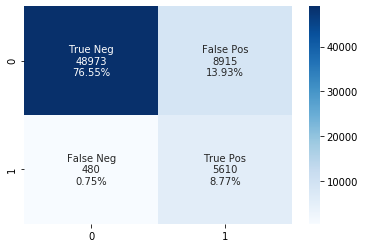

In [12]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

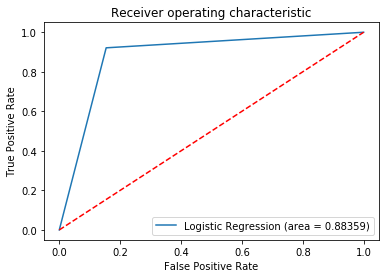

In [13]:
logit_roc = roc_auc_score(tox_log2['toxic'], tox_log2['Pred_toxic'])
fpr, tpr, thresholds = roc_curve(tox_log2['toxic'], tox_log2['Pred_toxic'])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % logit_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Toxic Try 3

In [70]:
test_label = pd.read_csv("test_labels.csv")
test = pd.read_csv("test.csv")
final_test = pd.concat([test, test_label], axis = 1)
final_test = final_test.query('toxic > -1')
final_test
train = pd.read_csv("train.csv")
final_test.columns

Index(['Unnamed: 0', 'id', 'comment_text', 'racism', 'id', 'toxic',
       'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],
      dtype='object')

In [71]:
train_toxic_minority = train[train.toxic == 1]
train_toxic_majority = train[train.toxic == 0]

train_toxic_majority_downsampled = resample(train_toxic_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=15294,     # to match minority class
                                 random_state=123) # reproducible results

train_downsampled_toxic = pd.concat([train_toxic_majority_downsampled, train_toxic_minority])
train_downsampled_toxic['toxic'].value_counts()
# train_downsampled_toxic

1    15294
0    15294
Name: toxic, dtype: int64

In [72]:
tfidf = TfidfVectorizer(stop_words='english', lowercase = True, ngram_range = (1,2), min_df = 10)

X_train = tfidf.fit_transform(train_downsampled_toxic['comment_text'])
X_test = tfidf.transform(final_test['comment_text'])

y = train_downsampled_toxic['toxic']
model = LogisticRegression(C = 10, class_weight = 'balanced', solver = 'newton-cg')
model.fit(X_train, y)
final_test['Pred_toxic'] = model.predict_proba(X_test)[:, 1]
test1 = final_test
# test1.drop('comment_text', axis=1, inplace=True)
test1.to_csv('logistic_toxic3.csv', index=False)

In [73]:
tox_log3 = pd.read_csv("logistic_toxic3.csv")
tox_log3
def CLASS(Pred_toxic):
  
    if Pred_toxic >= 0.5:
        return 1
    if Pred_toxic < 0.5:
        return 0

        
tox_log3['Pred_toxic'] = tox_log3['Pred_toxic'].apply(CLASS)
dropvar = ['Unnamed: 0', 'id']
tox_log3 = tox_log3.drop(dropvar, axis = 1)
tox_log3

,comment_text,racism,id.1,toxic,severe_toxic,obscene,threat,insult,identity_hate,Pred_toxic
0,Thank you for understanding. I think very highly of you and would not revert without discussion.,0,0001ea8717f6de06,0,0,0,0,0,0,0
1,:Dear god this site is horrible.,0,000247e83dcc1211,0,0,0,0,0,0,1
2,"""::: Somebody will invariably try to add Religion? Really?? You mean, the way people have invariably kept adding """"Religion"""" to the Samuel Beckett infobox? And why do you bother bringing up the long-dead completely non-existent """"Influences"""" issue? You're just flailing, making up crap on the fly. \n ::: For comparison, the only explicit acknowledgement in the entire Amos Oz article that he is personally Jewish is in the categories! \n\n """,1,0002f87b16116a7f,0,0,0,0,0,0,0
3,""" \n\n It says it right there that it IS a type. The """"Type"""" of institution is needed in this case because there are three levels of SUNY schools: \n -University Centers and Doctoral Granting Institutions \n -State Colleges \n -Community Colleges. \n\n It is needed in this case to clarify that UB is a SUNY Center. It says it even in Binghamton University, University at Albany, State University of New York, and Stony Brook University. Stop trying to say it's not because I am totally right in this case.""",0,0003e1cccfd5a40a,0,0,0,0,0,0,0
4,""" \n\n == Before adding a new product to the list, make sure it's relevant == \n\n Before adding a new product to the list, make sure it has a wikipedia entry already, """"proving"""" it's relevance and giving the reader the possibility to read more about it. \n Otherwise it could be subject to deletion. See this article's revision history.""",0,00059ace3e3e9a53,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
63973,":Jerome, I see you never got around to this…! I’m not surprised: I looked for an example of the ‘’in nomine’’ plainsong notaion and couldn’t find one online - to my astonishment too. \n :But maybe you could clear up a question for me: is the cantus firmus of the English ‘’in nomines’’ the plainchant (in the alto part), or one of Taverner’s other three parts? This is not clear to me in the article. If the ‘’in nomines’’ are based on the plainchant, then where does Taverner come into it? Your expertise would be most appreciated, and maybe the article requires some explanation to this effect.",0,fff8f64043129fa2,0,0,0,0,0,0,0
63974,==Lucky bastard== \n http://wikimediafoundation.org/wiki/Press_releases/English_Wikipedia_Announces_Thousandth_Featured_Article \n\n Heh you are famous now. I kida envy that. Congrats.,0,fff9d70fe0722906,0,0,0,0,0,0,1
63975,==shame on you all!!!== \n\n You want to speak about gays and not about romanians...,0,fffa8a11c4378854,0,0,0,0,0,0,1
63976,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MOVIES. HE HAS SO MUCH BUTTSEX THAT HIS ASSHOLE IS NOW BIG ENOUGH TO BE CONSIDERED A COUNTRY.,0,fffac2a094c8e0e2,1,0,1,0,1,0,1


In [74]:
cm = confusion_matrix(tox_log3['toxic'], tox_log3['Pred_toxic'])
print(cm)
print(classification_report(tox_log3['toxic'], tox_log3['Pred_toxic']))
print("Accuracy:",metrics.accuracy_score(tox_log3['toxic'], tox_log3['Pred_toxic']))
print("Precision:",metrics.precision_score(tox_log3['toxic'], tox_log3['Pred_toxic']))
print("Recall:",metrics.recall_score(tox_log3['toxic'], tox_log3['Pred_toxic']))
print("F1 Score:",metrics.f1_score(tox_log3['toxic'], tox_log3['Pred_toxic']))

[[48444  9444]
 [  462  5628]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     57888
           1       0.37      0.92      0.53      6090

    accuracy                           0.85     63978
   macro avg       0.68      0.88      0.72     63978
weighted avg       0.93      0.85      0.87     63978

Accuracy: 0.845165525649442
Precision: 0.3734076433121019
Recall: 0.9241379310344827
F1 Score: 0.5318967961440317


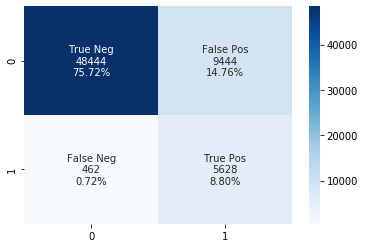

In [75]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

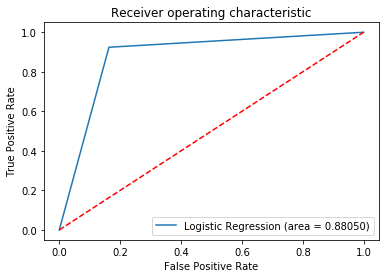

In [76]:
logit_roc = roc_auc_score(tox_log3['toxic'], tox_log3['Pred_toxic'])
fpr, tpr, thresholds = roc_curve(tox_log3['toxic'], tox_log3['Pred_toxic'])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % logit_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# RF Racism

In [60]:
test_label = pd.read_csv("test_labels.csv")
test = pd.read_csv("test.csv")
final_test = pd.concat([test, test_label], axis = 1)
final_test = final_test.query('toxic > -1')
final_test
train = pd.read_csv("train.csv")
final_test.columns

Index(['Unnamed: 0', 'id', 'comment_text', 'racism', 'id', 'toxic',
       'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],
      dtype='object')

In [61]:
train_racism_minority = train[train.racism == 1]
train_racism_majority = train[train.racism == 0]

train_racism_majority_downsampled = resample(train_racism_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2265,     # to match minority class
                                 random_state=123) # reproducible results

train_downsampled_racism = pd.concat([train_racism_majority_downsampled, train_racism_minority])
train_downsampled_racism['racism'].value_counts()
# train_downsampled_racism


a military salute that then stretched outward toward the flag. Historic photographs are at http://rexcurry.net/pledge2.html and at http://rexcurry.net/pledge_military.html   Due to the way that both gestures were used, the military salute led to the Nazi salute. The Nazi salute is an extended military salute. http://rexcurry.net/book1a1contents-pledge.html\n\n3. The Pledge’s creator was a self-proclaimed socialist in the nationalism movement in the USA and his dogma influenced socialists in Germany, and his Pledge was the origin of their salute. ""Nazi"" means ""National Socialist German Workers' Party."" A mnemonic device is the swastika (Hakenkreuz in German).  Although the swastika was an ancient symbol, it was also used sometimes by German National Socialists to represent ""S"" letters for their ""socialism.""  Hitler altered his own signature to use the same stylized ""S"" letter for ""socialist.""\nhttp://rexcurry.net/book1a1contents-swastika.html\n\nThe Pledge is part of the USA’s growing police-state.  The insane government in the U.S. could cause comatose persons to Pledge dis-allegiance, desecrate the flag, and recite a declaration of independence. Remove the Pledge from the flag, remove flags from schools, remove schools from government.\n\nAs a libertarian lawyer, Rex Curry provides pro bono services nationwide in schools and elsewhere, to educate the public about the news.\n\nGovernment schools will never teach children about their Pledge rights, nor the truth about the Pledge and its author.\n\nMost comments fail to ever mention that Francis Bellamy and his cousin Edward Bellamy were National Socialists in the USA, wrote for and supported their ""Nationalist"" and ""New Nation"" magazines, the ""Nationalist Educational Association"" and pushed their totalitarian dogma in their ""Nationalism"" clubs worldwide, including in Germany, and that the bible of their movement, Edward Bellamy's book ""Looking Backward"" was translated into every major language including the languages of those countries that became home to totalitarian socialism and the socialist Wholecaust (of which the Holocaust was a part) under the National Socialist German Workers' Party (21 million dead), the Union of Soviet Socialist Republics (62 million dead), and the Peoples' Republic of China (35 million dead).  It is easy to see why anyone would want to cover all of that up, but it should not be covered up.\n\nIn the USA, the Bellamy dogma supported a government takeover of education.  The government's schools imposed segregation by law and taught racism as official policy.  The USA's behavior was an example for three decades before the Nazis. As under Nazism, the Jehovah's Witnesses, and blacks and the Jewish and others in the USA attended government schools that dictated segregation, taught racism, and persecuted children who refused to perform the straight-arm salute and robotically chant the Pledge. Some kids were expelled from government schools and had to use the many better alternatives.  There were acts of violence. When Jesse Owens competed in the 1936 Olympics in Germany, his neighbors attended segregated government schools where they saluted the flag with the Nazi salute.  The U.S. practice of official racism even outlasted the horrid party.  And the schools and the Pledge still exist. The Pledge is still the most visible sign of the USA's growing police state.  \n\nAfter segregation in government's schools ended, the Bellamy legacy caused more police-state racism of forced busing that destroyed communities and neighborhoods and deepened hostilities.\n\nBellamy was a self-proclaimed national socialist in the USA, with the ""Nationalist"" magazine, and he preached what he called ""military socialism.""  The federal flag darkens schools because Bellamy wanted government to take over all schools and to eliminate all of the better alternatives.  Worse, Bellamy wanted the government to take over everything, not just schools. He wanted the 

In [62]:
tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(train_downsampled_racism['comment_text'])
X_test = tfidf.transform(final_test['comment_text'])

y = train_downsampled_racism['racism']
model = RandomForestClassifier()
model.fit(X_train, y)
final_test['Pred_racism'] = model.predict_proba(X_test)[:, 1]
test1 = final_test
# test1.drop('comment_text', axis=1, inplace=True)
test1.to_csv('rf_racism.csv', index=False)

In [63]:
race_rf1 = pd.read_csv("rf_racism.csv")
race_rf1
def CLASS(Pred_racism):
  
    if Pred_racism >= 0.5:
        return 1
    if Pred_racism < 0.5:
        return 0

        
race_rf1['Pred_racism'] = race_rf1['Pred_racism'].apply(CLASS)
dropvar = ['Unnamed: 0', 'id']
race_rf1 = race_rf1.drop(dropvar, axis = 1)
race_rf1

,comment_text,racism,id.1,toxic,severe_toxic,obscene,threat,insult,identity_hate,Pred_racism
0,Thank you for understanding. I think very highly of you and would not revert without discussion.,0,0001ea8717f6de06,0,0,0,0,0,0,0
1,:Dear god this site is horrible.,0,000247e83dcc1211,0,0,0,0,0,0,0
2,"""::: Somebody will invariably try to add Religion? Really?? You mean, the way people have invariably kept adding """"Religion"""" to the Samuel Beckett infobox? And why do you bother bringing up the long-dead completely non-existent """"Influences"""" issue? You're just flailing, making up crap on the fly. \n ::: For comparison, the only explicit acknowledgement in the entire Amos Oz article that he is personally Jewish is in the categories! \n\n """,1,0002f87b16116a7f,0,0,0,0,0,0,1
3,""" \n\n It says it right there that it IS a type. The """"Type"""" of institution is needed in this case because there are three levels of SUNY schools: \n -University Centers and Doctoral Granting Institutions \n -State Colleges \n -Community Colleges. \n\n It is needed in this case to clarify that UB is a SUNY Center. It says it even in Binghamton University, University at Albany, State University of New York, and Stony Brook University. Stop trying to say it's not because I am totally right in this case.""",0,0003e1cccfd5a40a,0,0,0,0,0,0,0
4,""" \n\n == Before adding a new product to the list, make sure it's relevant == \n\n Before adding a new product to the list, make sure it has a wikipedia entry already, """"proving"""" it's relevance and giving the reader the possibility to read more about it. \n Otherwise it could be subject to deletion. See this article's revision history.""",0,00059ace3e3e9a53,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
63973,":Jerome, I see you never got around to this…! I’m not surprised: I looked for an example of the ‘’in nomine’’ plainsong notaion and couldn’t find one online - to my astonishment too. \n :But maybe you could clear up a question for me: is the cantus firmus of the English ‘’in nomines’’ the plainchant (in the alto part), or one of Taverner’s other three parts? This is not clear to me in the article. If the ‘’in nomines’’ are based on the plainchant, then where does Taverner come into it? Your expertise would be most appreciated, and maybe the article requires some explanation to this effect.",0,fff8f64043129fa2,0,0,0,0,0,0,0
63974,==Lucky bastard== \n http://wikimediafoundation.org/wiki/Press_releases/English_Wikipedia_Announces_Thousandth_Featured_Article \n\n Heh you are famous now. I kida envy that. Congrats.,0,fff9d70fe0722906,0,0,0,0,0,0,0
63975,==shame on you all!!!== \n\n You want to speak about gays and not about romanians...,0,fffa8a11c4378854,0,0,0,0,0,0,0
63976,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MOVIES. HE HAS SO MUCH BUTTSEX THAT HIS ASSHOLE IS NOW BIG ENOUGH TO BE CONSIDERED A COUNTRY.,0,fffac2a094c8e0e2,1,0,1,0,1,0,0


In [64]:
cm = confusion_matrix(race_rf1['racism'], race_rf1['Pred_racism'])
print(cm)
print(classification_report(race_rf1['racism'], race_rf1['Pred_racism']))
print("Accuracy:",metrics.accuracy_score(race_rf1['racism'], race_rf1['Pred_racism']))
print("Precision:",metrics.precision_score(race_rf1['racism'], race_rf1['Pred_racism']))
print("Recall:",metrics.recall_score(race_rf1['racism'], race_rf1['Pred_racism']))
print("F1 Score:",metrics.f1_score(race_rf1['racism'], race_rf1['Pred_racism']))

[[57416  5493]
 [  111   958]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     62909
           1       0.15      0.90      0.25      1069

    accuracy                           0.91     63978
   macro avg       0.57      0.90      0.60     63978
weighted avg       0.98      0.91      0.94     63978

Accuracy: 0.9124073900403263
Precision: 0.14850410789024956
Recall: 0.8961646398503275
F1 Score: 0.2547872340425532


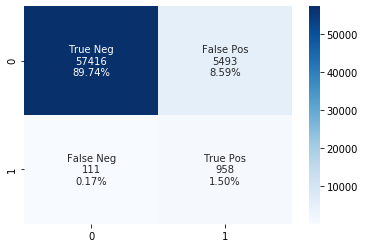

In [65]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

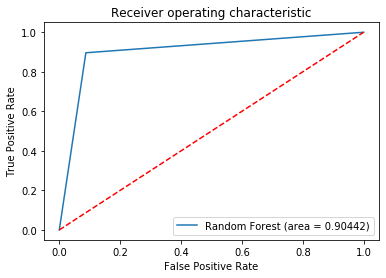

In [66]:
rf_roc = roc_auc_score(race_rf1['racism'], race_rf1['Pred_racism'])
fpr, tpr, thresholds = roc_curve(race_rf1['racism'], race_rf1['Pred_racism'])
plt.plot(fpr, tpr, label='Random Forest (area = %0.5f)' % rf_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# RF Racism Try 2

In [77]:
test_label = pd.read_csv("test_labels.csv")
test = pd.read_csv("test.csv")
final_test = pd.concat([test, test_label], axis = 1)
final_test = final_test.query('toxic > -1')
final_test
train = pd.read_csv("train.csv")
final_test.columns

Index(['Unnamed: 0', 'id', 'comment_text', 'racism', 'id', 'toxic',
       'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],
      dtype='object')

In [78]:
train_racism_minority = train[train.racism == 1]
train_racism_majority = train[train.racism == 0]

train_racism_majority_downsampled = resample(train_racism_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2265,     # to match minority class
                                 random_state=123) # reproducible results

train_downsampled_racism = pd.concat([train_racism_majority_downsampled, train_racism_minority])
train_downsampled_racism['racism'].value_counts()
# train_downsampled_racism


1    2265
0    2265
Name: racism, dtype: int64

In [79]:
tfidf = TfidfVectorizer(stop_words='english', lowercase = True, ngram_range = [1,2], min_df = 2)

X_train = tfidf.fit_transform(train_downsampled_racism['comment_text'])
X_test = tfidf.transform(final_test['comment_text'])

y = train_downsampled_racism['racism']
model = RandomForestClassifier(class_weight = 'balanced')
model.fit(X_train, y)
final_test['Pred_racism'] = model.predict_proba(X_test)[:, 1]
test1 = final_test
# test1.drop('comment_text', axis=1, inplace=True)
test1.to_csv('rf_racism2.csv', index=False)

In [80]:
race_rf2 = pd.read_csv("rf_racism2.csv")
race_rf2
def CLASS(Pred_racism):
  
    if Pred_racism >= 0.5:
        return 1
    if Pred_racism < 0.5:
        return 0

        
race_rf2['Pred_racism'] = race_rf2['Pred_racism'].apply(CLASS)
dropvar = ['Unnamed: 0', 'id']
race_rf2 = race_rf2.drop(dropvar, axis = 1)
race_rf2

,comment_text,racism,id.1,toxic,severe_toxic,obscene,threat,insult,identity_hate,Pred_racism
0,Thank you for understanding. I think very highly of you and would not revert without discussion.,0,0001ea8717f6de06,0,0,0,0,0,0,0
1,:Dear god this site is horrible.,0,000247e83dcc1211,0,0,0,0,0,0,0
2,"""::: Somebody will invariably try to add Religion? Really?? You mean, the way people have invariably kept adding """"Religion"""" to the Samuel Beckett infobox? And why do you bother bringing up the long-dead completely non-existent """"Influences"""" issue? You're just flailing, making up crap on the fly. \n ::: For comparison, the only explicit acknowledgement in the entire Amos Oz article that he is personally Jewish is in the categories! \n\n """,1,0002f87b16116a7f,0,0,0,0,0,0,1
3,""" \n\n It says it right there that it IS a type. The """"Type"""" of institution is needed in this case because there are three levels of SUNY schools: \n -University Centers and Doctoral Granting Institutions \n -State Colleges \n -Community Colleges. \n\n It is needed in this case to clarify that UB is a SUNY Center. It says it even in Binghamton University, University at Albany, State University of New York, and Stony Brook University. Stop trying to say it's not because I am totally right in this case.""",0,0003e1cccfd5a40a,0,0,0,0,0,0,0
4,""" \n\n == Before adding a new product to the list, make sure it's relevant == \n\n Before adding a new product to the list, make sure it has a wikipedia entry already, """"proving"""" it's relevance and giving the reader the possibility to read more about it. \n Otherwise it could be subject to deletion. See this article's revision history.""",0,00059ace3e3e9a53,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
63973,":Jerome, I see you never got around to this…! I’m not surprised: I looked for an example of the ‘’in nomine’’ plainsong notaion and couldn’t find one online - to my astonishment too. \n :But maybe you could clear up a question for me: is the cantus firmus of the English ‘’in nomines’’ the plainchant (in the alto part), or one of Taverner’s other three parts? This is not clear to me in the article. If the ‘’in nomines’’ are based on the plainchant, then where does Taverner come into it? Your expertise would be most appreciated, and maybe the article requires some explanation to this effect.",0,fff8f64043129fa2,0,0,0,0,0,0,0
63974,==Lucky bastard== \n http://wikimediafoundation.org/wiki/Press_releases/English_Wikipedia_Announces_Thousandth_Featured_Article \n\n Heh you are famous now. I kida envy that. Congrats.,0,fff9d70fe0722906,0,0,0,0,0,0,0
63975,==shame on you all!!!== \n\n You want to speak about gays and not about romanians...,0,fffa8a11c4378854,0,0,0,0,0,0,0
63976,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MOVIES. HE HAS SO MUCH BUTTSEX THAT HIS ASSHOLE IS NOW BIG ENOUGH TO BE CONSIDERED A COUNTRY.,0,fffac2a094c8e0e2,1,0,1,0,1,0,1


In [81]:
cm = confusion_matrix(race_rf2['racism'], race_rf2['Pred_racism'])
print(cm)
print(classification_report(race_rf2['racism'], race_rf2['Pred_racism']))
print("Accuracy:",metrics.accuracy_score(race_rf2['racism'], race_rf2['Pred_racism']))
print("Precision:",metrics.precision_score(race_rf2['racism'], race_rf2['Pred_racism']))
print("Recall:",metrics.recall_score(race_rf2['racism'], race_rf2['Pred_racism']))
print("F1 Score:",metrics.f1_score(race_rf2['racism'], race_rf2['Pred_racism']))

[[60052  2857]
 [   61  1008]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     62909
           1       0.26      0.94      0.41      1069

    accuracy                           0.95     63978
   macro avg       0.63      0.95      0.69     63978
weighted avg       0.99      0.95      0.97     63978

Accuracy: 0.9543905717590422
Precision: 0.26080206985769727
Recall: 0.9429373246024322
F1 Score: 0.4085934333198216


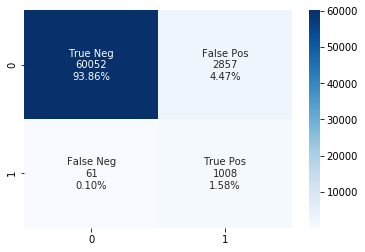

In [82]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

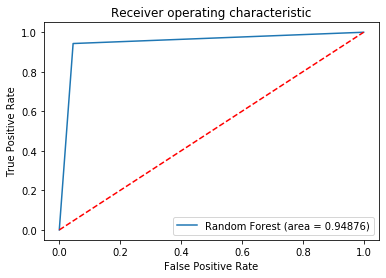

In [83]:
rf_roc = roc_auc_score(race_rf2['racism'], race_rf2['Pred_racism'])
fpr, tpr, thresholds = roc_curve(race_rf2['racism'], race_rf2['Pred_racism'])
plt.plot(fpr, tpr, label='Random Forest (area = %0.5f)' % rf_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# RF Toxic Try 1

In [74]:
test_label = pd.read_csv("test_labels.csv")
test = pd.read_csv("test.csv")
final_test = pd.concat([test, test_label], axis = 1)
final_test = final_test.query('toxic > -1')
final_test
train = pd.read_csv("train.csv")
final_test.columns

Index(['Unnamed: 0', 'id', 'comment_text', 'racism', 'id', 'toxic',
       'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],
      dtype='object')

In [75]:
train_toxic_minority = train[train.toxic == 1]
train_toxic_majority = train[train.toxic == 0]

train_toxic_majority_downsampled = resample(train_toxic_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=15294,     # to match minority class
                                 random_state=123) # reproducible results

train_downsampled_toxic = pd.concat([train_toxic_majority_downsampled, train_toxic_minority])
train_downsampled_toxic['toxic'].value_counts()
train_downsampled_toxic

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,racism
25946,25947,44b14c2d39cb089a,"""\n File:Bust of Otis Bowen.jpg listed for deletion \nA file that you uploaded or altered, File:Bust of Otis Bowen.jpg, has been listed at Wikipedia:Files for deletion. Please see the discussion to see why this is (you may have to search for the title of the image to find its entry), if you are interested in it not being deleted. Thank you. hi! """,0,0,0,0,0,0,0
39853,39854,6a61ce6cdf0c193f,"WP:BOOMERANG rebuttal \n\nI would like to point out that I said that after I had already asked this user to stop reverting my edits and instead he did not respond and just deleted my comments from his talk page, he then went and found a completely separate article I created over 1/2 a year ago a nominated for deletion. This is obviously harrassment. Just because made angry comments to one ignorant user, does not make me uncivil. When my negative comments were reverted I instead issued a warning template for harrassment to wp:logical cowboy, and asked him to please cease and desist with harassing me, next thing I know I've been blocked.",0,0,0,0,0,0,0
39117,39118,686182438c1b8c10,"Further note to potential reviewing admin If we have interacted in the past, thank you for your interest, but allow an uninvolved admin to review this. I will of course accept any further review. - (resonate)",0,0,0,0,0,0,0
111546,111547,54bb3a15477f2711,"|decline=Under the circumstances, I suggest that you consider following the Standard Offer approach.",0,0,0,0,0,0,0
113941,113942,616495d4d5547956,"To respond i think that this is a CLEAR violation of the use policy, the author clearly went to High School here and he and his school should have been finished off by the hurricane.",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
159494,159495,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fucking shit eating liberal, you make lady bird johnson shake on her tampon. I said fucking sorry for my little brother and you still had to fucking complain. My life is fucking shit. My mother is always yelling at me and my dad beats the shit out of me if I get fucking out of line. My brother's one outlet is wikipedia. He cried when he saw my father smacking me, and his tears clogged his mac book pro's keyboard. we had to go to fucking apple and get a new one, all out of my mom's pocket. then last night i wanted to take this hot pussy from connecticut out in my dad's new rolls-royce and he said fucking no. so you know what I fucking did? I fucking cut his pinky off and didnt snitch like a little bitch like you. I take lazy ass niggers like you and stomp you with my fat nazi heel. you should be FUCKING sorry you ever fucked with me or my dad (Steve Jobs). And if I find out your using Linux, I'll take pity on thee. Cause you're just too stupid to understand shit. i can see your fucking at some fucking computer and you think that you have some power on this fucking site. let me tell you something you little bitch. when i'm doing coke off strippers titties in da clubz, you can just edit some fucking wikipedia articles. i smoke a phat blunt every damn day, and you smoke your mom's fucking tea. So, in closing, as Shakespeare said in Sonnet ninety-four (I believe): """"things turn sourest by their deeds. Lillies that fester smell far worse than (fucking) weeds.""""\nfuck you and heil hitler.\n\n-n. jobs\n\nps- if you ever fucking ban this ip again, there is going to be some serious shit thats gonna happen. i know a fucking guy.""",1,0,1,0,1,1,1
159514,159515,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0,0
159541,159542,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on great white shark was total vandalism and was very sexual. All you edit here is fucking bullshit like spam all over this useful encyclopedia so stop all your bullshit. The admins have you everywhere. The only choice for you is to stop this bullshit or else

In [76]:
tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(train_downsampled_toxic['comment_text'])
X_test = tfidf.transform(final_test['comment_text'])

y = train_downsampled_toxic['toxic']
model = RandomForestClassifier()
model.fit(X_train, y)
final_test['Pred_toxic'] = model.predict_proba(X_test)[:, 1]
test1 = final_test
# test1.drop('comment_text', axis=1, inplace=True)
test1.to_csv('rf_toxic.csv', index=False)

In [77]:
tox_rf1 = pd.read_csv("rf_toxic.csv")
tox_rf1
def CLASS(Pred_toxic):
  
    if Pred_toxic >= 0.5:
        return 1
    if Pred_toxic < 0.5:
        return 0

        
tox_rf1['Pred_toxic'] = tox_rf1['Pred_toxic'].apply(CLASS)
dropvar = ['Unnamed: 0', 'id']
tox_rf1 = tox_rf1.drop(dropvar, axis = 1)
tox_rf1

,comment_text,racism,id.1,toxic,severe_toxic,obscene,threat,insult,identity_hate,Pred_toxic
0,Thank you for understanding. I think very highly of you and would not revert without discussion.,0,0001ea8717f6de06,0,0,0,0,0,0,0
1,:Dear god this site is horrible.,0,000247e83dcc1211,0,0,0,0,0,0,1
2,"""::: Somebody will invariably try to add Religion? Really?? You mean, the way people have invariably kept adding """"Religion"""" to the Samuel Beckett infobox? And why do you bother bringing up the long-dead completely non-existent """"Influences"""" issue? You're just flailing, making up crap on the fly. \n ::: For comparison, the only explicit acknowledgement in the entire Amos Oz article that he is personally Jewish is in the categories! \n\n """,1,0002f87b16116a7f,0,0,0,0,0,0,0
3,""" \n\n It says it right there that it IS a type. The """"Type"""" of institution is needed in this case because there are three levels of SUNY schools: \n -University Centers and Doctoral Granting Institutions \n -State Colleges \n -Community Colleges. \n\n It is needed in this case to clarify that UB is a SUNY Center. It says it even in Binghamton University, University at Albany, State University of New York, and Stony Brook University. Stop trying to say it's not because I am totally right in this case.""",0,0003e1cccfd5a40a,0,0,0,0,0,0,0
4,""" \n\n == Before adding a new product to the list, make sure it's relevant == \n\n Before adding a new product to the list, make sure it has a wikipedia entry already, """"proving"""" it's relevance and giving the reader the possibility to read more about it. \n Otherwise it could be subject to deletion. See this article's revision history.""",0,00059ace3e3e9a53,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
63973,":Jerome, I see you never got around to this…! I’m not surprised: I looked for an example of the ‘’in nomine’’ plainsong notaion and couldn’t find one online - to my astonishment too. \n :But maybe you could clear up a question for me: is the cantus firmus of the English ‘’in nomines’’ the plainchant (in the alto part), or one of Taverner’s other three parts? This is not clear to me in the article. If the ‘’in nomines’’ are based on the plainchant, then where does Taverner come into it? Your expertise would be most appreciated, and maybe the article requires some explanation to this effect.",0,fff8f64043129fa2,0,0,0,0,0,0,0
63974,==Lucky bastard== \n http://wikimediafoundation.org/wiki/Press_releases/English_Wikipedia_Announces_Thousandth_Featured_Article \n\n Heh you are famous now. I kida envy that. Congrats.,0,fff9d70fe0722906,0,0,0,0,0,0,1
63975,==shame on you all!!!== \n\n You want to speak about gays and not about romanians...,0,fffa8a11c4378854,0,0,0,0,0,0,1
63976,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MOVIES. HE HAS SO MUCH BUTTSEX THAT HIS ASSHOLE IS NOW BIG ENOUGH TO BE CONSIDERED A COUNTRY.,0,fffac2a094c8e0e2,1,0,1,0,1,0,1


In [78]:
cm = confusion_matrix(tox_rf1['toxic'], tox_rf1['Pred_toxic'])
print(cm)
print(classification_report(tox_rf1['toxic'], tox_rf1['Pred_toxic']))
print("Accuracy:",metrics.accuracy_score(tox_rf1['toxic'], tox_rf1['Pred_toxic']))
print("Precision:",metrics.precision_score(tox_rf1['toxic'], tox_rf1['Pred_toxic']))
print("Recall:",metrics.recall_score(tox_rf1['toxic'], tox_rf1['Pred_toxic']))
print("F1 Score:",metrics.f1_score(tox_rf1['toxic'], tox_rf1['Pred_toxic']))

[[47388 10500]
 [ 1052  5038]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     57888
           1       0.32      0.83      0.47      6090

    accuracy                           0.82     63978
   macro avg       0.65      0.82      0.68     63978
weighted avg       0.92      0.82      0.85     63978

Accuracy: 0.8194379317890524
Precision: 0.32423735358475997
Recall: 0.8272577996715927
F1 Score: 0.46587756611799525


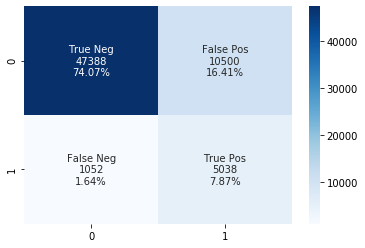

In [79]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

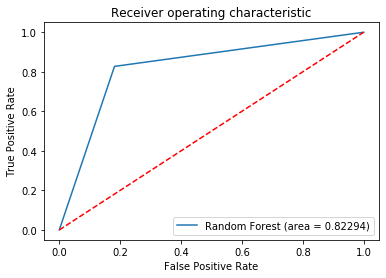

In [80]:
rf_roc = roc_auc_score(tox_rf1['toxic'], tox_rf1['Pred_toxic'])
fpr, tpr, thresholds = roc_curve(tox_rf1['toxic'], tox_rf1['Pred_toxic'])
plt.plot(fpr, tpr, label='Random Forest (area = %0.5f)' % rf_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# RF Toxic Try 2

In [84]:
test_label = pd.read_csv("test_labels.csv")
test = pd.read_csv("test.csv")
final_test = pd.concat([test, test_label], axis = 1)
final_test = final_test.query('toxic > -1')
final_test
train = pd.read_csv("train.csv")
final_test.columns

Index(['Unnamed: 0', 'id', 'comment_text', 'racism', 'id', 'toxic',
       'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],
      dtype='object')

In [85]:
train_toxic_minority = train[train.toxic == 1]
train_toxic_majority = train[train.toxic == 0]

train_toxic_majority_downsampled = resample(train_toxic_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=15294,     # to match minority class
                                 random_state=123) # reproducible results

train_downsampled_toxic = pd.concat([train_toxic_majority_downsampled, train_toxic_minority])
train_downsampled_toxic['toxic'].value_counts()
# train_downsampled_toxic

1    15294
0    15294
Name: toxic, dtype: int64

In [86]:
tfidf = TfidfVectorizer(stop_words='english', lowercase = True, ngram_range = [1,2], min_df = 10)

X_train = tfidf.fit_transform(train_downsampled_toxic['comment_text'])
X_test = tfidf.transform(final_test['comment_text'])

y = train_downsampled_toxic['toxic']
model = RandomForestClassifier(class_weight = 'balanced')
model.fit(X_train, y)
final_test['Pred_toxic'] = model.predict_proba(X_test)[:, 1]
test1 = final_test
# test1.drop('comment_text', axis=1, inplace=True)
test1.to_csv('rf_toxic2.csv', index=False)

In [87]:
tox_rf2 = pd.read_csv("rf_toxic2.csv")
tox_rf2
def CLASS(Pred_toxic):
  
    if Pred_toxic >= 0.5:
        return 1
    if Pred_toxic < 0.5:
        return 0

        
tox_rf2['Pred_toxic'] = tox_rf2['Pred_toxic'].apply(CLASS)
dropvar = ['Unnamed: 0', 'id']
tox_rf2 = tox_rf2.drop(dropvar, axis = 1)
tox_rf2

,comment_text,racism,id.1,toxic,severe_toxic,obscene,threat,insult,identity_hate,Pred_toxic
0,Thank you for understanding. I think very highly of you and would not revert without discussion.,0,0001ea8717f6de06,0,0,0,0,0,0,0
1,:Dear god this site is horrible.,0,000247e83dcc1211,0,0,0,0,0,0,1
2,"""::: Somebody will invariably try to add Religion? Really?? You mean, the way people have invariably kept adding """"Religion"""" to the Samuel Beckett infobox? And why do you bother bringing up the long-dead completely non-existent """"Influences"""" issue? You're just flailing, making up crap on the fly. \n ::: For comparison, the only explicit acknowledgement in the entire Amos Oz article that he is personally Jewish is in the categories! \n\n """,1,0002f87b16116a7f,0,0,0,0,0,0,0
3,""" \n\n It says it right there that it IS a type. The """"Type"""" of institution is needed in this case because there are three levels of SUNY schools: \n -University Centers and Doctoral Granting Institutions \n -State Colleges \n -Community Colleges. \n\n It is needed in this case to clarify that UB is a SUNY Center. It says it even in Binghamton University, University at Albany, State University of New York, and Stony Brook University. Stop trying to say it's not because I am totally right in this case.""",0,0003e1cccfd5a40a,0,0,0,0,0,0,0
4,""" \n\n == Before adding a new product to the list, make sure it's relevant == \n\n Before adding a new product to the list, make sure it has a wikipedia entry already, """"proving"""" it's relevance and giving the reader the possibility to read more about it. \n Otherwise it could be subject to deletion. See this article's revision history.""",0,00059ace3e3e9a53,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
63973,":Jerome, I see you never got around to this…! I’m not surprised: I looked for an example of the ‘’in nomine’’ plainsong notaion and couldn’t find one online - to my astonishment too. \n :But maybe you could clear up a question for me: is the cantus firmus of the English ‘’in nomines’’ the plainchant (in the alto part), or one of Taverner’s other three parts? This is not clear to me in the article. If the ‘’in nomines’’ are based on the plainchant, then where does Taverner come into it? Your expertise would be most appreciated, and maybe the article requires some explanation to this effect.",0,fff8f64043129fa2,0,0,0,0,0,0,0
63974,==Lucky bastard== \n http://wikimediafoundation.org/wiki/Press_releases/English_Wikipedia_Announces_Thousandth_Featured_Article \n\n Heh you are famous now. I kida envy that. Congrats.,0,fff9d70fe0722906,0,0,0,0,0,0,1
63975,==shame on you all!!!== \n\n You want to speak about gays and not about romanians...,0,fffa8a11c4378854,0,0,0,0,0,0,1
63976,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MOVIES. HE HAS SO MUCH BUTTSEX THAT HIS ASSHOLE IS NOW BIG ENOUGH TO BE CONSIDERED A COUNTRY.,0,fffac2a094c8e0e2,1,0,1,0,1,0,1


In [88]:
cm = confusion_matrix(tox_rf2['toxic'], tox_rf2['Pred_toxic'])
print(cm)
print(classification_report(tox_rf2['toxic'], tox_rf2['Pred_toxic']))
print("Accuracy:",metrics.accuracy_score(tox_rf2['toxic'], tox_rf2['Pred_toxic']))
print("Precision:",metrics.precision_score(tox_rf2['toxic'], tox_rf2['Pred_toxic']))
print("Recall:",metrics.recall_score(tox_rf2['toxic'], tox_rf2['Pred_toxic']))
print("F1 Score:",metrics.f1_score(tox_rf2['toxic'], tox_rf2['Pred_toxic']))

[[49033  8855]
 [  624  5466]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     57888
           1       0.38      0.90      0.54      6090

    accuracy                           0.85     63978
   macro avg       0.68      0.87      0.72     63978
weighted avg       0.93      0.85      0.88     63978

Accuracy: 0.8518396948951202
Precision: 0.3816772571747783
Recall: 0.8975369458128079
F1 Score: 0.535593552496203


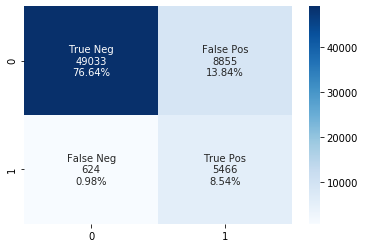

In [89]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

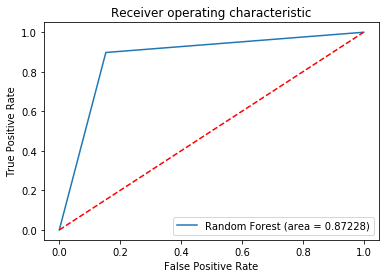

In [90]:
rf_roc = roc_auc_score(tox_rf2['toxic'], tox_rf2['Pred_toxic'])
fpr, tpr, thresholds = roc_curve(tox_rf2['toxic'], tox_rf2['Pred_toxic'])
plt.plot(fpr, tpr, label='Random Forest (area = %0.5f)' % rf_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
train = pd.read_csv('train.csv')
print(train['toxic'].value_counts())
print(train['racism'].value_counts())

0    144277
1    15294 
Name: toxic, dtype: int64
0    157306
1    2265  
Name: racism, dtype: int64


In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ["0","1"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[144277, 15294], name="Toxic"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[157306, 2265], name="Racism"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Sampling Distribution for Toxic and Racism Comment",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Toxic', x=0.17, y=0.5, font_size=20, showarrow=False),
                 dict(text='Racism', x=0.85, y=0.5, font_size=20, showarrow=False)])
fig.show()